In [1]:
%matplotlib inline
!pip install lightkurve

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.6/247.6 KB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 KB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 KB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 108.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 112.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 735.0/735.0 KB 90.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.7/832.7 KB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.3/596.3 KB 87.8 MB/s

In [2]:
import lightkurve as lk # https://colab.research.google.com/drive/1F4_bexKlzQI8MkUH5ZpM8NzLTGcWVjkp?usp=sharing#scrollTo=fySRue9rEFH4
import matplotlib.pyplot as plt

In [3]:
TIC = 'TIC 470710327'
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector=18)
sector_data

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 18,2019,SPOC,120,470710327,0.0


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

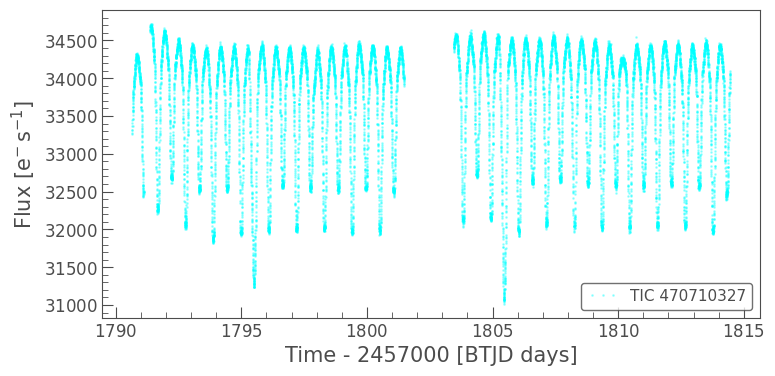

In [4]:
lc= sector_data.download()
lc.plot(linewidth = 0, marker = '.', color = 'cyan', alpha = 0.3)

# Second planet (for comparison)

### All available data for TIC id

In [5]:
TIC_2 = 'TIC 55525572'
available_data_all = lk.search_lightkurve(TIC_2, author = 'SPOC')
available_data_all

AttributeError: module 'lightkurve' has no attribute 'search_lightkurve'

### Specific sectors

In [ ]:
select_sectors = available_data_all[0:4]
select_sectors

In [ ]:
lc_collection = select_sectors.download_all()
lc_collection.plot()

## Stitch each sector together

In [ ]:
lc_noramlize = lc.normalize()
lc.normalize.plot(marker = '.', linewidth = 0, color = 'grey')

# Planets

In [ ]:
TIC = 'TIC 470710327'
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 18)
lc = sector_data.download()
lc = lk.search_lightcurve(TIC, author='SPOC', sector=18).download()
lc = lc.remove_nans().remove_outliers()
# lc.to_fits(path='lightcurve.fits')

In [ ]:
available_data = lk.search_lightcurve(TIC, author = 'SPOC')
available_data

In [ ]:
select_sectors = available_data[0:4]
lc_collection = select_sectors.download_all()
lc_collection.plot() # lc_collection.to_fits(path='lightcurve.fits')

In [ ]:
lc_collection_stitched = lc_collection.stitch()
lc_collection_stitched.plot(color = 'gold', lw = 0, marker = '.')

In [ ]:
lc_normalize = lc.normalize()
lc_normalize.plot()

## Planet 2

In [ ]:
TIC_2 = 'TIC 55525572'
available_data_all = lk.search_lightcurve(TIC_2, author = 'SPOC')
available_data_all

In [ ]:
sector_data = lk.search_lightcurve(TIC_2, author = 'SPOC')
lc = sector_data.download()
lc = lk.search_lightcurve(TIC, author='SPOC').download()
lc = lc.remove_nans().remove_outliers()

In [ ]:
select_sectors = available_data_all[0:4]
lc_collection = select_sectors.download_all()
lc_collection.plot() # lc_collection.to_fits(path='lightcurve.fits')

In [ ]:
lc_collection_stitched = lc_collection.stitch()
lc_collection_stitched.plot(color = 'gold', lw = 0, marker = '.')

In [ ]:
lc_normalize = lc.normalize()
lc_normalize.plot()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b4c251b4-c11a-481e-8206-c29934eb75da' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>